In [9]:
library(CMplot)
library(dplyr)
library(tidyr)

In [5]:
trans_data <- read.table(
    gzfile("Garb_01G000040_trans_MAF.5.txt.gz"),
    header = T,
    sep=","
)

In [16]:
#TODO 切割获取染色体ID和SNP坐标
trans_data <- separate(data = trans_data, col = "variant_id", into = c(
    "Chromosome", "Position"
), sep = "_", remove = FALSE)
#调整列出现的顺序
plotData=trans_data %>% select(c("variant_id", "Chromosome", "Position","pval"))

In [25]:
plotData %>% filter(pval<=1/nrow(plotData))

variant_id,Chromosome,Position,pval
<fct>,<chr>,<chr>,<dbl>
12_119343172,12,119343172,6.012033e-08
12_119358264,12,119358264,6.936327e-08
12_119359227,12,119359227,1.123156e-07
12_119391118,12,119391118,3.781388e-08
12_119401304,12,119401304,1.259025e-08
12_119424092,12,119424092,9.132270e-08
12_119485396,12,119485396,8.957855e-08


In [23]:
head(plotData)

,variant_id,Chromosome,Position,pval
,<fct>,<chr>,<chr>,<dbl>
1,1_784,1,784,0.337817038
2,1_831,1,831,0.749978448
3,1_3045,1,3045,0.006713613
4,1_3169,1,3169,0.017767390
5,1_7848,1,7848,0.978508259
6,1_7900,1,7900,0.183733228


In [24]:
CMplot(plotData,
    plot.type = "m",
    col = c("grey30", "grey60"),
    LOG10 = TRUE,
    threshold=1/nrow(plotData),
    chr.den.col = NULL,
    file = "jpg", memo = "",
    dpi = 600,
    chr.labels=c(paste("A",sprintf('%02d',seq(1,13)),sep="")),
    width = 20, height = 6,
    file.output = TRUE, verbose = TRUE
)

 Rectangular-Manhattan Plotting pval.
 Plots are stored in: /public/home/zpliu/github/eQTL_pipeline 


In [26]:
#TODO 绘制QQ-plot
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





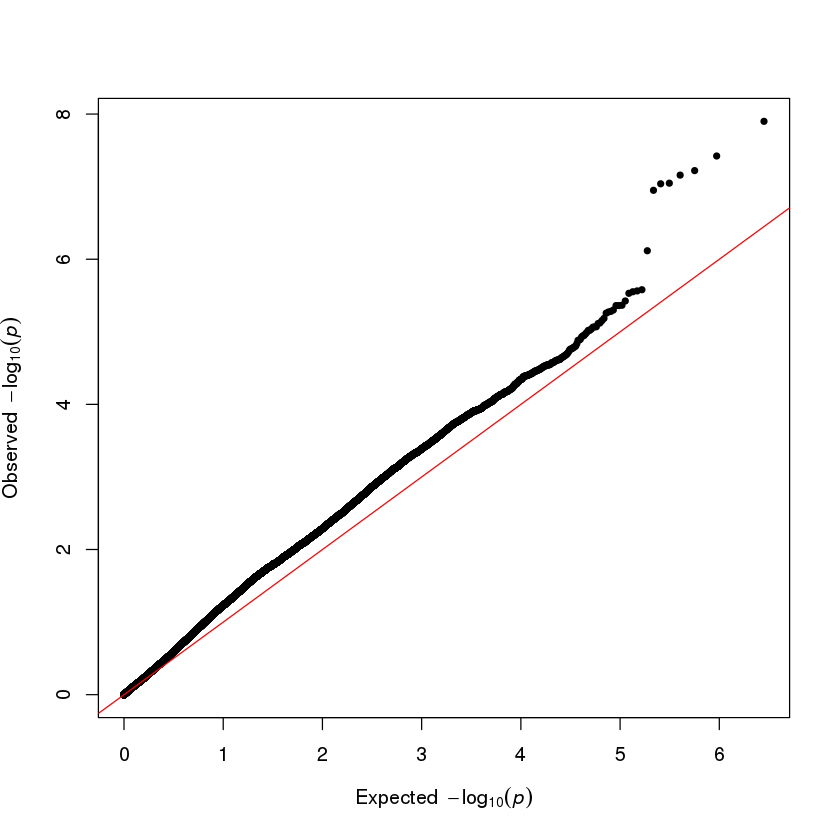

In [27]:
qq(plotData$pval)